## Lab 5 z Podstaw Uczenia Maszynowego - Drzewo Decyzyjne
### Autor: Dominik Pabiniak
### Nr indeksu: 254397

In [94]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

def sensitivity(m_p):
    return round((m_p[0][0]/(m_p[0][0] + m_p[0][1])), 4)
def specificity(m_p):
    return round((m_p[1][1]/(m_p[1][0] + m_p[1][1])), 4)

def plot_class(X_syn_test, y_syn_test, model, method):
        X_pred_0 = X_syn_test[y_syn_test == 0]
        X_pred_1 = X_syn_test[y_syn_test == 1]
        x_min, x_max = X_syn_test[:, 0].min() - 0.2, X_syn_test[:, 0].max() + 0.2
        y_min, y_max = X_syn_test[:, 1].min() - 0.2, X_syn_test[:, 1].max() + 0.2
        xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
        Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)
        plt.contourf(xx, yy, Z, alpha=0.2)
        plt.scatter(X_pred_0[:, 0], X_pred_0[:, 1], marker='.', label='Klasa 1')
        plt.scatter(X_pred_1[:, 0], X_pred_1[:, 1], marker='.', label='Klasa 2')
        plt.title(f'Powierzchnia decyzyjna {method}')
        plt.xlabel('Cecha 1')
        plt.ylabel('Cecha 2')
        plt.legend()

def pred_info(y_test, y_pred, name_of_method):
    accuracy = accuracy_score(y_test, y_pred)
    c_matrix = confusion_matrix(y_test, y_pred)
    print(f'\n{name_of_method}:')
    print(f'Macierz pomylek: \n{c_matrix}')
    print(f'Dokladnosc: {accuracy}\nCzulosc: {sensitivity(c_matrix)}\nSwoistosc: {specificity(c_matrix)}')

In [95]:
class Node:
    def __init__(self, feature_index=None, threshold=None, left=None, right=None, value=None):
        self.feature_index = feature_index
        self.threshold = threshold
        self.left = left
        self.right = right
        self.value = value

class MDecisionTree:
    def __init__(self, max_depth=None):
        self.max_depth = max_depth

    def fit(self, X, y):
        self.n_classes_ = len(np.unique(y))
        self.n_features_ = X.shape[1]
        self.tree_ = self._grow_tree(X, y)

    def _grow_tree(self, X, y, depth=0):
        n_labels = len(np.unique(y))

        if (self.max_depth is not None and depth >= self.max_depth) or n_labels == 1:
            leaf_value = self._most_common_label(y)
            return Node(value=leaf_value)

        best_feature, best_threshold = self._find_best_split(X, y)

        left_indices = X[:, best_feature] < best_threshold
        right_indices = ~left_indices

        left = self._grow_tree(X[left_indices], y[left_indices], depth + 1)
        right = self._grow_tree(X[right_indices], y[right_indices], depth + 1)

        return Node(feature_index=best_feature, threshold=best_threshold, left=left, right=right)

    def _find_best_split(self, X, y):
        _, n_features = X.shape
        best_entropy = float('inf')
        best_feature = None
        best_threshold = None

        for feature_index in range(n_features):
            thresholds = np.linspace(min(X[:, feature_index]), max(X[:, feature_index]), 20)
            for threshold in thresholds:
                left_indices = X[:, feature_index] < threshold
                right_indices = ~left_indices
                entropy = self._entropy(y[left_indices], y[right_indices])
                if entropy < best_entropy:
                    best_entropy = entropy
                    best_feature = feature_index
                    best_threshold = threshold

        return best_feature, best_threshold

    def _entropy(self, *sides):
        total_samples = sum(len(side) for side in sides)
        entropy = 0.0
        for side in sides:
            size = float(len(side))
            if size == 0:
                continue
            score = 0.0
            for class_val in np.unique(side):
                p = np.sum(side == class_val) / size
                score += p * np.log2(p)
            entropy -= score * (size / total_samples)
        return entropy

    def _most_common_label(self, y):
        y_int = y.astype(np.int64)
        return np.bincount(y_int).argmax()

    def predict(self, X):
        return np.array([self._traverse_tree(x, self.tree_) for x in X])

    def _traverse_tree(self, x, node):
        if node.value is not None:
            return node.value
        if x[node.feature_index] < node.threshold:
            return self._traverse_tree(x, node.left)
        else:
            return self._traverse_tree(x, node.right)

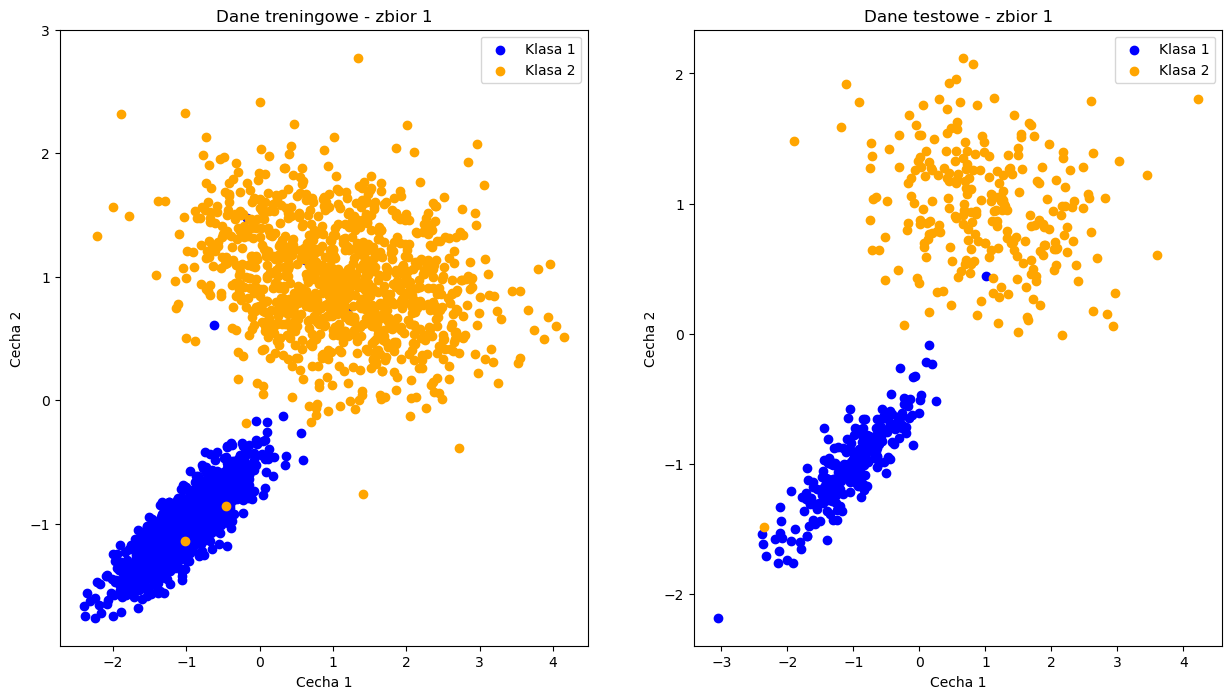

In [96]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

index = 254397

scaler = MinMaxScaler()
# Dane wejsciowe
X, t = make_classification(n_samples=2597, n_features=2, n_clusters_per_class=1, n_redundant=0, random_state=index)

#Podzial na podzbiory
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X, t, test_size=0.2, random_state=index)


# Podzial zbiorow na klasy w celu ich wyswietlenia
klasa_0_train = X_train_2[(y_train_2 == 0)]
klasa_1_train = X_train_2[(y_train_2 == 1)]
klasa_0_test = X_test_2[(y_test_2 == 0)]
klasa_1_test = X_test_2[(y_test_2 == 1)]

# Wyswietlenie danych
_, axs = plt.subplots(1, 2, figsize=(15, 8))
ax = axs[0]
ax.scatter(klasa_0_train[:,0], klasa_0_train[:,1], c = "blue", label="Klasa 1")
ax.scatter(klasa_1_train[:,0], klasa_1_train[:,1], c = "orange", label="Klasa 2")
ax.set_title("Dane treningowe - zbior 1")
ax.set_xlabel("Cecha 1")
ax.set_ylabel("Cecha 2")
ax.legend()

ax = axs[1]
ax.scatter(klasa_0_test[:,0], klasa_0_test[:,1], c = "blue", label="Klasa 1")
ax.scatter(klasa_1_test[:,0], klasa_1_test[:,1], c = "orange", label="Klasa 2")
ax.set_title("Dane testowe - zbior 1")
ax.set_xlabel("Cecha 1")
ax.set_ylabel("Cecha 2")
ax.legend()

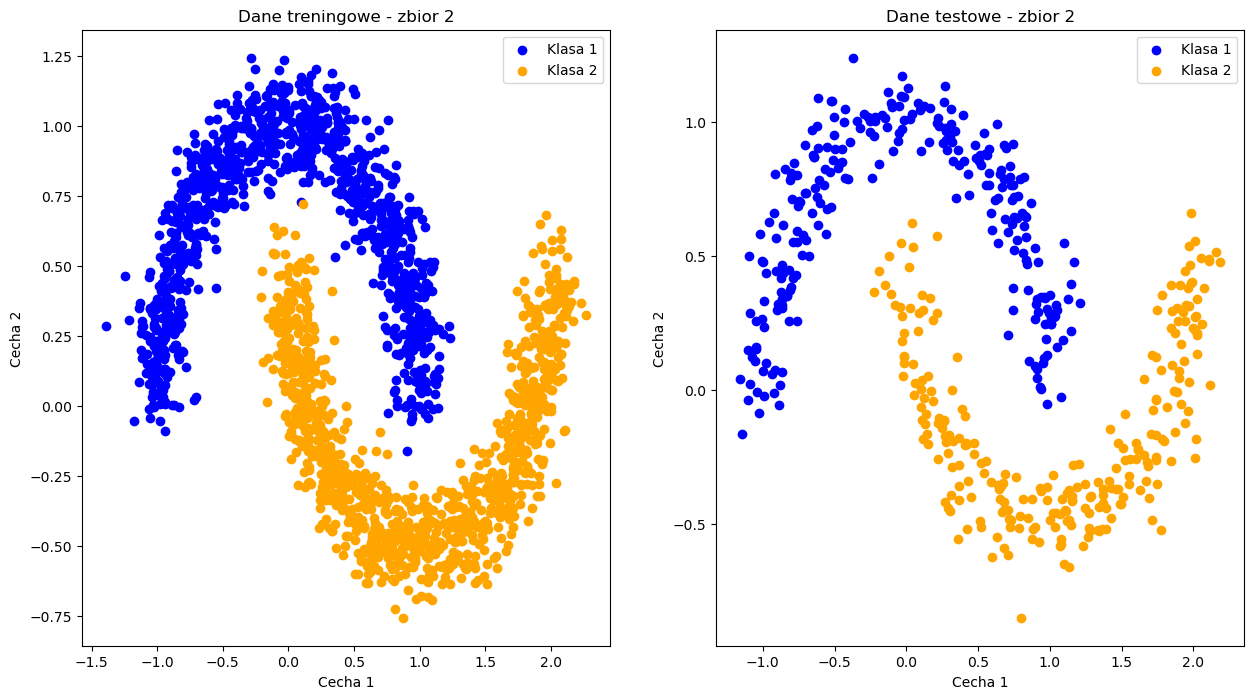

In [97]:
from sklearn.datasets import make_moons

# Dane wejsciowe
X_m, t_m = make_moons(n_samples=2597, random_state=index, noise=0.1)

#Podzial na podzbiory
X_train_M, X_test_M, y_train_M, y_test_M = train_test_split(X_m, t_m, test_size=0.2, random_state=index)

# Podzial zbiorow na klasy w celu ich wyswietlenia
klasa_0_train_M = X_train_M[(y_train_M == 0)]
klasa_1_train_M = X_train_M[(y_train_M == 1)]
klasa_0_test_M = X_test_M[(y_test_M == 0)]
klasa_1_test_M = X_test_M[(y_test_M == 1)]

# Wyswietlenie danych
_, axs = plt.subplots(1, 2, figsize=(15, 8))
ax = axs[0]
ax.scatter(klasa_0_train_M[:,0], klasa_0_train_M[:,1], c = "blue", label="Klasa 1")
ax.scatter(klasa_1_train_M[:,0], klasa_1_train_M[:,1], c = "orange", label="Klasa 2")
ax.set_title("Dane treningowe - zbior 2")
ax.set_xlabel("Cecha 1")
ax.set_ylabel("Cecha 2")
ax.legend()

ax = axs[1]
ax.scatter(klasa_0_test_M[:,0], klasa_0_test_M[:,1], c = "blue", label="Klasa 1")
ax.scatter(klasa_1_test_M[:,0], klasa_1_test_M[:,1], c = "orange", label="Klasa 2")
ax.set_title("Dane testowe - zbior 2")
ax.set_xlabel("Cecha 1")
ax.set_ylabel("Cecha 2")
ax.legend()

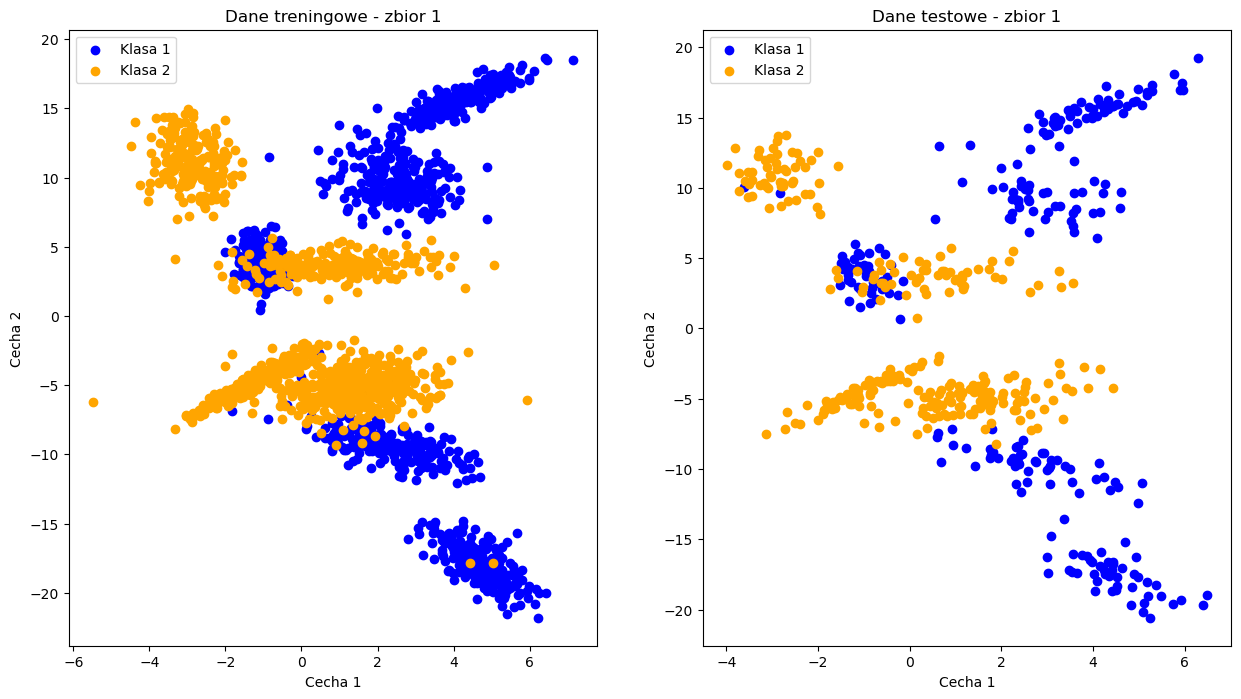

In [98]:
# Dane wejsciowe
X, t = make_classification(n_samples=2597, n_features=4, n_informative=4, n_repeated=0, n_clusters_per_class=5, random_state=index, hypercube=False, n_redundant=0, class_sep=20)
X = X[:,:2]
#Podzial na podzbiory
X_train_4, X_test_4, y_train_4, y_test_4 = train_test_split(X, t, test_size=0.2, random_state=index)

# Podzial zbiorow na klasy w celu ich wyswietlenia
klasa_0_train = X_train_4[(y_train_4 == 0)]
klasa_1_train = X_train_4[(y_train_4 == 1)]
klasa_0_test = X_test_4[(y_test_4 == 0)]
klasa_1_test = X_test_4[(y_test_4 == 1)]

# Wyswietlenie danych
_, axs = plt.subplots(1, 2, figsize=(15, 8))
ax = axs[0]
ax.scatter(klasa_0_train[:,0], klasa_0_train[:,1], c = "blue", label="Klasa 1")
ax.scatter(klasa_1_train[:,0], klasa_1_train[:,1], c = "orange", label="Klasa 2")
ax.set_title("Dane treningowe - zbior 1")
ax.set_xlabel("Cecha 1")
ax.set_ylabel("Cecha 2")
ax.legend()

ax = axs[1]
ax.scatter(klasa_0_test[:,0], klasa_0_test[:,1], c = "blue", label="Klasa 1")
ax.scatter(klasa_1_test[:,0], klasa_1_test[:,1], c = "orange", label="Klasa 2")
ax.set_title("Dane testowe - zbior 1")
ax.set_xlabel("Cecha 1")
ax.set_ylabel("Cecha 2")
ax.legend()

Sredni czas przy nieograniczonej glebokosci: 9.317636489868164e-05 s
Sredni czas przy glebokosci = 2: 5.9802532196044925e-05 s

Glebokosc=None:
Macierz pomylek: 
[[259   4]
 [  6 251]]
Dokladnosc: 0.9807692307692307
Czulosc: 0.9848
Swoistosc: 0.9767

Glebokosc=2:
Macierz pomylek: 
[[261   2]
 [  1 256]]
Dokladnosc: 0.9942307692307693
Czulosc: 0.9924
Swoistosc: 0.9961


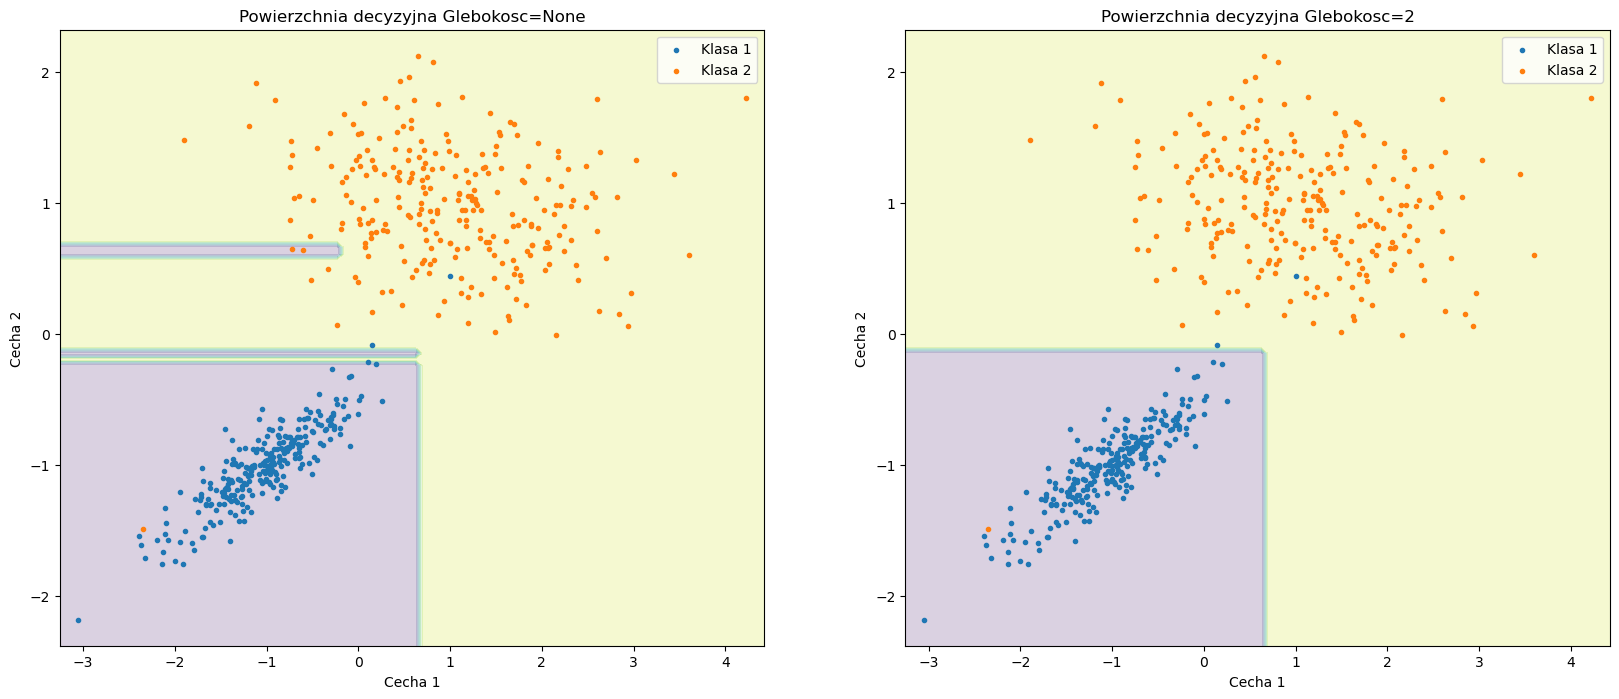

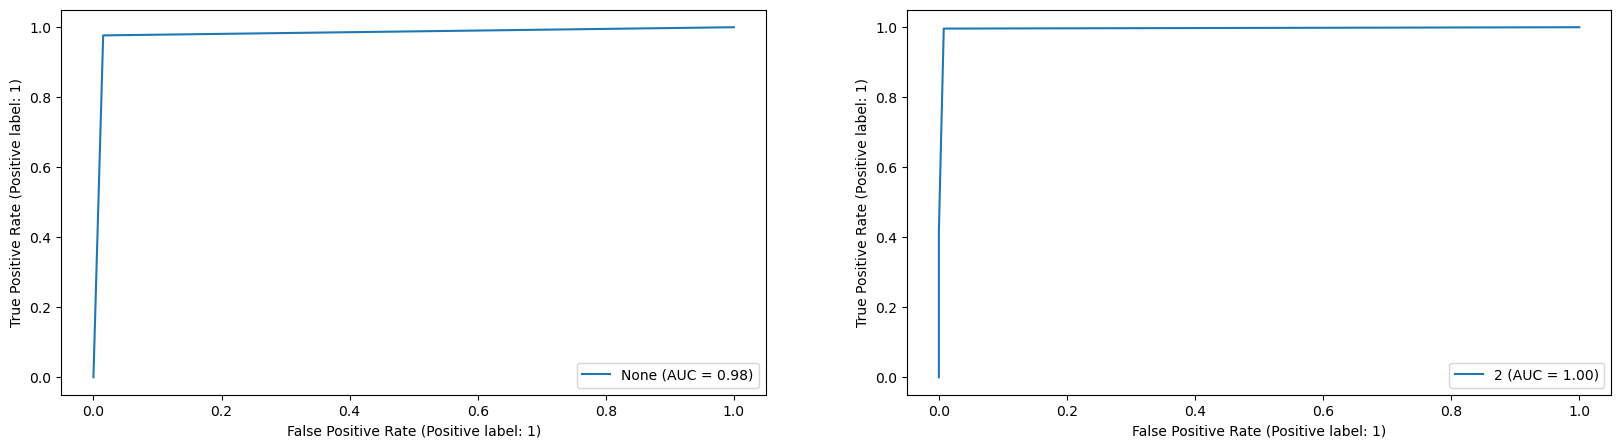

In [117]:
import time
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import RocCurveDisplay

# Nieograniczona glebokosc
dt_2_n = DecisionTreeClassifier(random_state=index, criterion='entropy')
dt_2_n.fit(X_train_2, y_train_2)
start = time.time()
for i in range(100):
    y_pred_2_n = dt_2_n.predict(X_test_2)
end = time.time()
print(f'Sredni czas przy nieograniczonej glebokosci: {(end - start)/100} s')

# Glebokosc rowna ilosci cech
dt_2_2 = DecisionTreeClassifier(random_state=index, max_depth=2, criterion='entropy')
dt_2_2.fit(X_train_2, y_train_2)
start = time.time()
for i in range(100):
    y_pred_2_2 = dt_2_2.predict(X_test_2)
end = time.time()
print(f'Sredni czas przy glebokosci = 2: {(end - start)/100} s')

pred_info(y_test_2, y_pred_2_n, 'Glebokosc=None')
pred_info(y_test_2, y_pred_2_2, 'Glebokosc=2')


plt.figure(figsize=(20, 8))
plt.subplot(1, 2, 1)
plot_class(X_test_2, y_test_2, dt_2_n, 'Glebokosc=None')
plt.subplot(1, 2, 2)
plot_class(X_test_2, y_test_2, dt_2_2, 'Glebokosc=2')

y_scores_2_n = dt_2_n.predict_proba(X_test_2)[:, 1]
y_scores_2_2 = dt_2_2.predict_proba(X_test_2)[:, 1]

_, axs = plt.subplots(1, 2, figsize=(20, 5))
RocCurveDisplay.from_predictions(y_test_2, y_scores_2_n, name='None', ax=axs[0])
RocCurveDisplay.from_predictions(y_test_2, y_scores_2_2, name='2', ax=axs[1])

Sredni czas przy nieograniczonej glebokosci: 4.9872398376464845e-05 s
Sredni czas przy glebokosci = 2: 4.983901977539062e-05 s

Glebokosc=None:
Macierz pomylek: 
[[264   0]
 [  1 255]]
Dokladnosc: 0.9980769230769231
Czulosc: 1.0
Swoistosc: 0.9961

Glebokosc=4:
Macierz pomylek: 
[[257   7]
 [ 35 221]]
Dokladnosc: 0.9192307692307692
Czulosc: 0.9735
Swoistosc: 0.8633


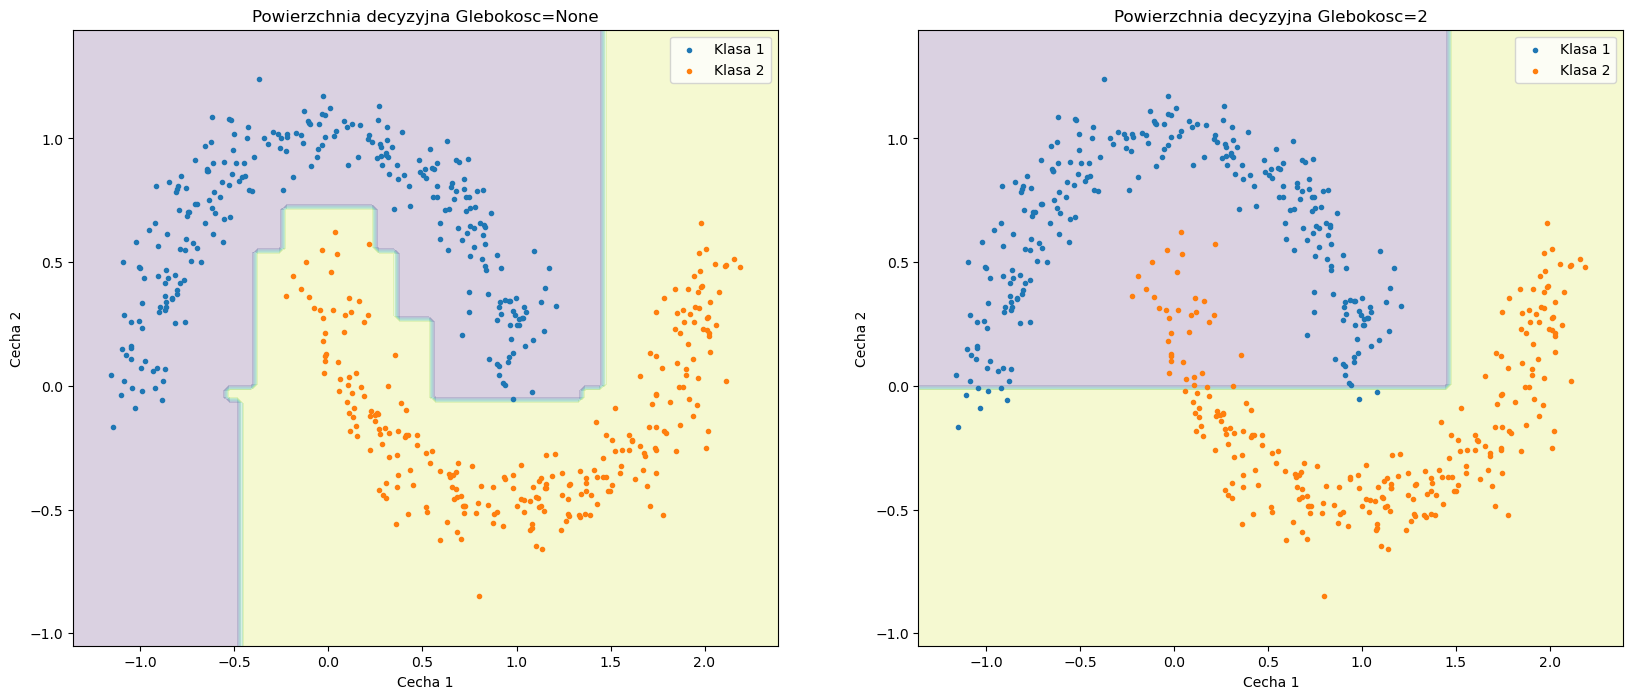

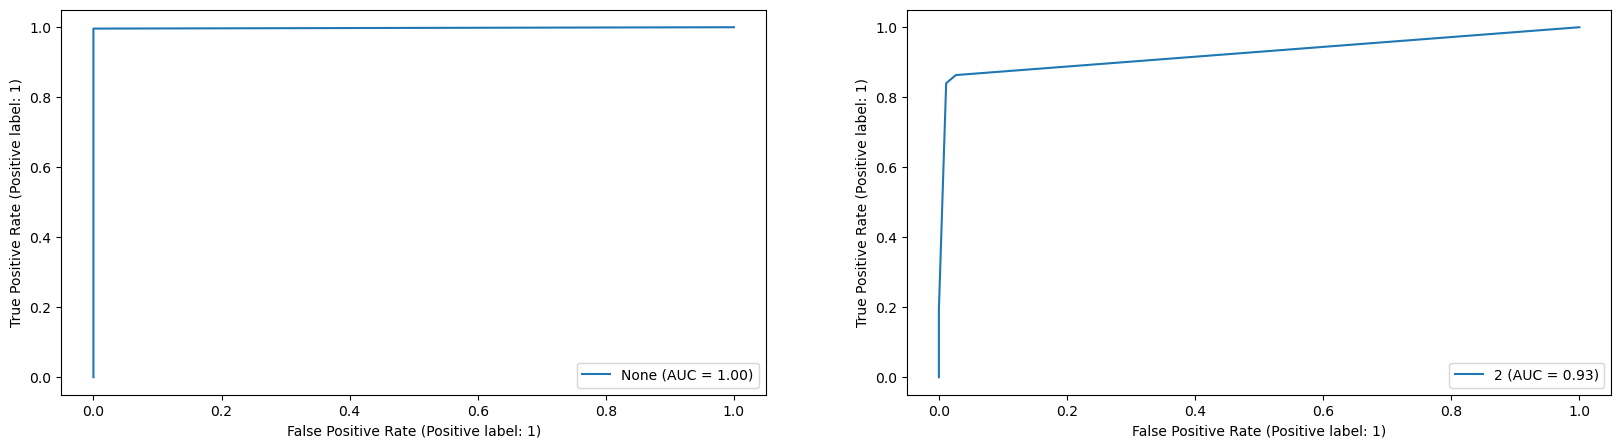

In [100]:
import time
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import RocCurveDisplay

# Nieograniczona glebokosc
dt_m_n = DecisionTreeClassifier(random_state=index, criterion='entropy')
dt_m_n.fit(X_train_M, y_train_M)
start = time.time()
for i in range(100):
    y_pred_m_n = dt_m_n.predict(X_test_M)
end = time.time()
print(f'Sredni czas przy nieograniczonej glebokosci: {(end - start)/100} s')

# Glebokosc rowna ilosci cech
dt_m_2 = DecisionTreeClassifier(random_state=index, max_depth=2, criterion='entropy')
dt_m_2.fit(X_train_M, y_train_M)
start = time.time()
for i in range(100):
    y_pred_m_2 = dt_m_2.predict(X_test_M)
end = time.time()
print(f'Sredni czas przy glebokosci = 2: {(end - start)/100} s')

pred_info(y_test_M, y_pred_m_n, 'Glebokosc=None')
pred_info(y_test_M, y_pred_m_2, 'Glebokosc=4')

plt.figure(figsize=(20, 8))
plt.subplot(1, 2, 1)
plot_class(X_test_M, y_test_M, dt_m_n, 'Glebokosc=None')
plt.subplot(1, 2, 2)
plot_class(X_test_M, y_test_M, dt_m_2, 'Glebokosc=2')

y_scores_m_n = dt_m_n.predict_proba(X_test_M)[:, 1]
y_scores_m_2 = dt_m_2.predict_proba(X_test_M)[:, 1]

_, axs = plt.subplots(1, 2, figsize=(20, 5))
RocCurveDisplay.from_predictions(y_test_M, y_scores_m_n, name='None', ax=axs[0])
RocCurveDisplay.from_predictions(y_test_M, y_scores_m_2, name='2', ax=axs[1])

Sredni czas przy nieograniczonej glebokosci: 6.044387817382813e-05 s
Sredni czas przy glebokosci = 4: 4.9834251403808596e-05 s
Sredni czas przy glebokosci = 5: 4.982948303222656e-05 s

Glebokosc=None:
Macierz pomylek: 
[[233  14]
 [ 18 255]]
Dokladnosc: 0.9384615384615385
Czulosc: 0.9433
Swoistosc: 0.9341

Glebokosc=4:
Macierz pomylek: 
[[226  21]
 [ 18 255]]
Dokladnosc: 0.925
Czulosc: 0.915
Swoistosc: 0.9341

Glebokosc=5:
Macierz pomylek: 
[[237  10]
 [ 16 257]]
Dokladnosc: 0.95
Czulosc: 0.9595
Swoistosc: 0.9414


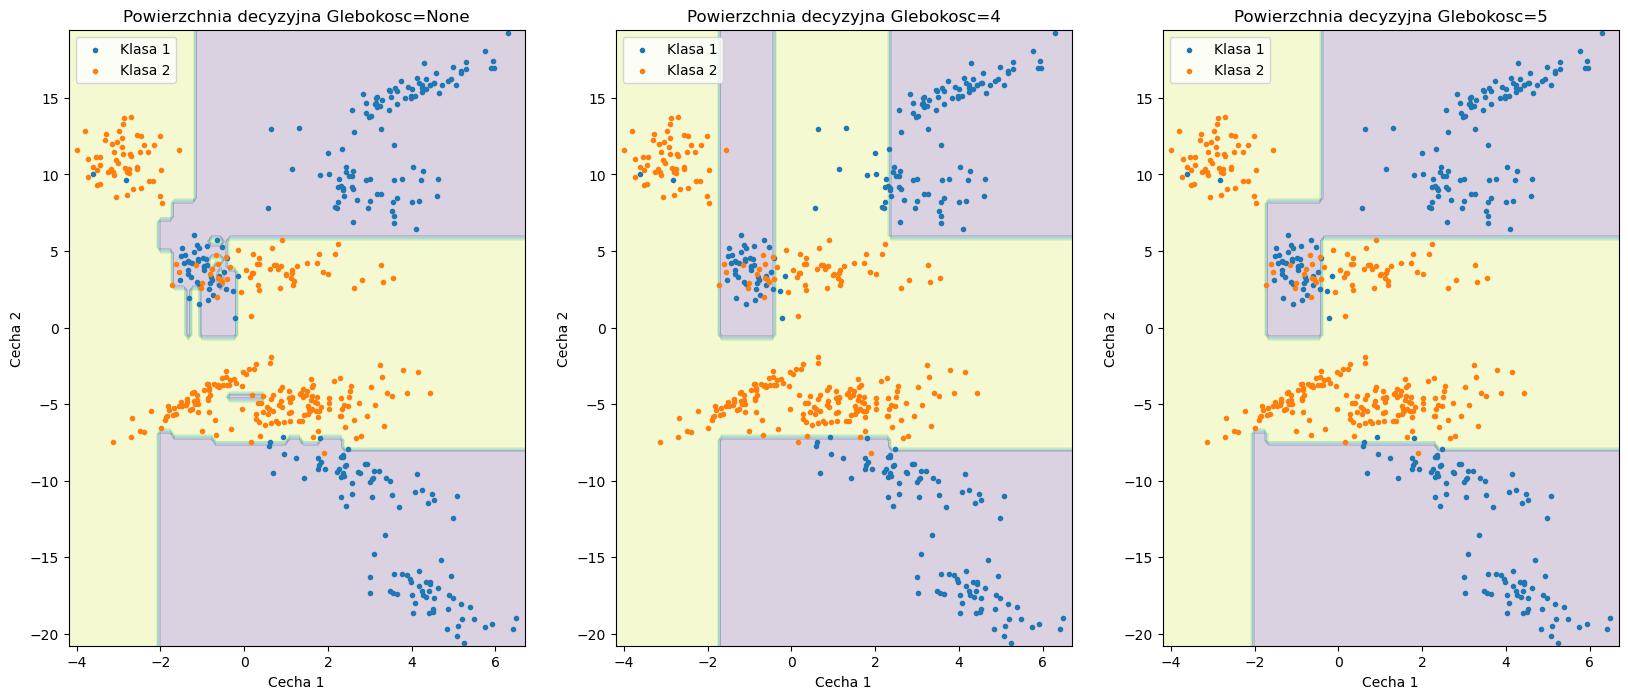

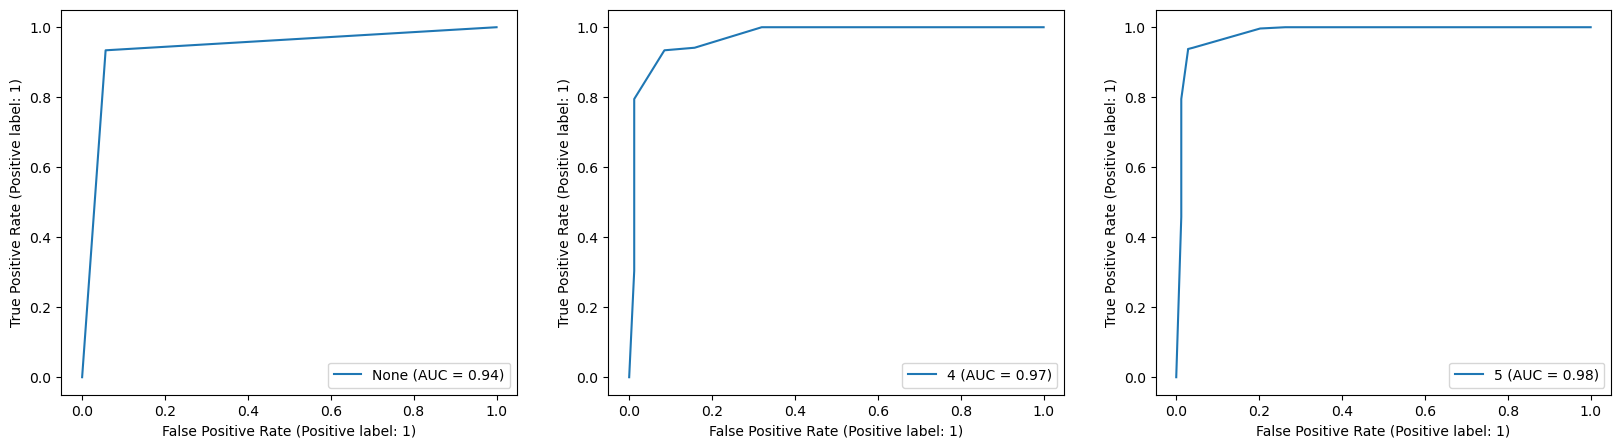

In [101]:
# Nieograniczona glebokosc
dt_4_n = DecisionTreeClassifier(criterion='entropy')
dt_4_n.fit(X_train_4, y_train_4)
start = time.time()
for i in range(100):
    y_pred_4_n = dt_4_n.predict(X_test_4)
end = time.time()
print(f'Sredni czas przy nieograniczonej glebokosci: {(end - start)/100} s')


# Glebokosc rowna ilosci cech
dt_4_4 = DecisionTreeClassifier(max_depth=4, criterion='entropy')
dt_4_4.fit(X_train_4, y_train_4)
start = time.time()
for i in range(100):
    y_pred_4_4 = dt_4_4.predict(X_test_4)
end = time.time()
print(f'Sredni czas przy glebokosci = 4: {(end - start)/100} s')

# Glebokosc rowna ilosci klastrow
dt_4_5 = DecisionTreeClassifier(max_depth=5, criterion='entropy')
dt_4_5.fit(X_train_4, y_train_4)
start = time.time()
for i in range(100):
    y_pred_4_5 = dt_4_5.predict(X_test_4)
end = time.time()
print(f'Sredni czas przy glebokosci = 5: {(end - start)/100} s')

pred_info(y_test_4, y_pred_4_n, 'Glebokosc=None')
pred_info(y_test_4, y_pred_4_4, 'Glebokosc=4')
pred_info(y_test_4, y_pred_4_5, 'Glebokosc=5')

plt.figure(figsize=(20, 8))
plt.subplot(1, 3, 1)
plot_class(X_test_4, y_test_4, dt_4_n, 'Glebokosc=None')
plt.subplot(1, 3, 2)
plot_class(X_test_4, y_test_4, dt_4_4, 'Glebokosc=4')
plt.subplot(1, 3, 3)
plot_class(X_test_4, y_test_4, dt_4_5, 'Glebokosc=5')

y_scores_4_n = dt_4_n.predict_proba(X_test_4)[:, 1]
y_scores_4_4 = dt_4_4.predict_proba(X_test_4)[:, 1]
y_scores_4_5 = dt_4_5.predict_proba(X_test_4)[:, 1]

_, axs = plt.subplots(1, 3, figsize=(20, 5))
RocCurveDisplay.from_predictions(y_test_4, y_scores_4_n, name='None', ax=axs[0])
RocCurveDisplay.from_predictions(y_test_4, y_scores_4_4, name='4', ax=axs[1])
RocCurveDisplay.from_predictions(y_test_4, y_scores_4_5, name='5', ax=axs[2])

Sredni czas przy nieograniczonej glebokosci: 0.03289008140563965 s
Sredni czas przy glebokosci = 2: 0.0189363956451416 s

Glebokosc=None:
Macierz pomylek: 
[[261   2]
 [  5 252]]
Dokladnosc: 0.9865384615384616
Czulosc: 0.9924
Swoistosc: 0.9805

Glebokosc=2:
Macierz pomylek: 
[[261   2]
 [  1 256]]
Dokladnosc: 0.9942307692307693
Czulosc: 0.9924
Swoistosc: 0.9961


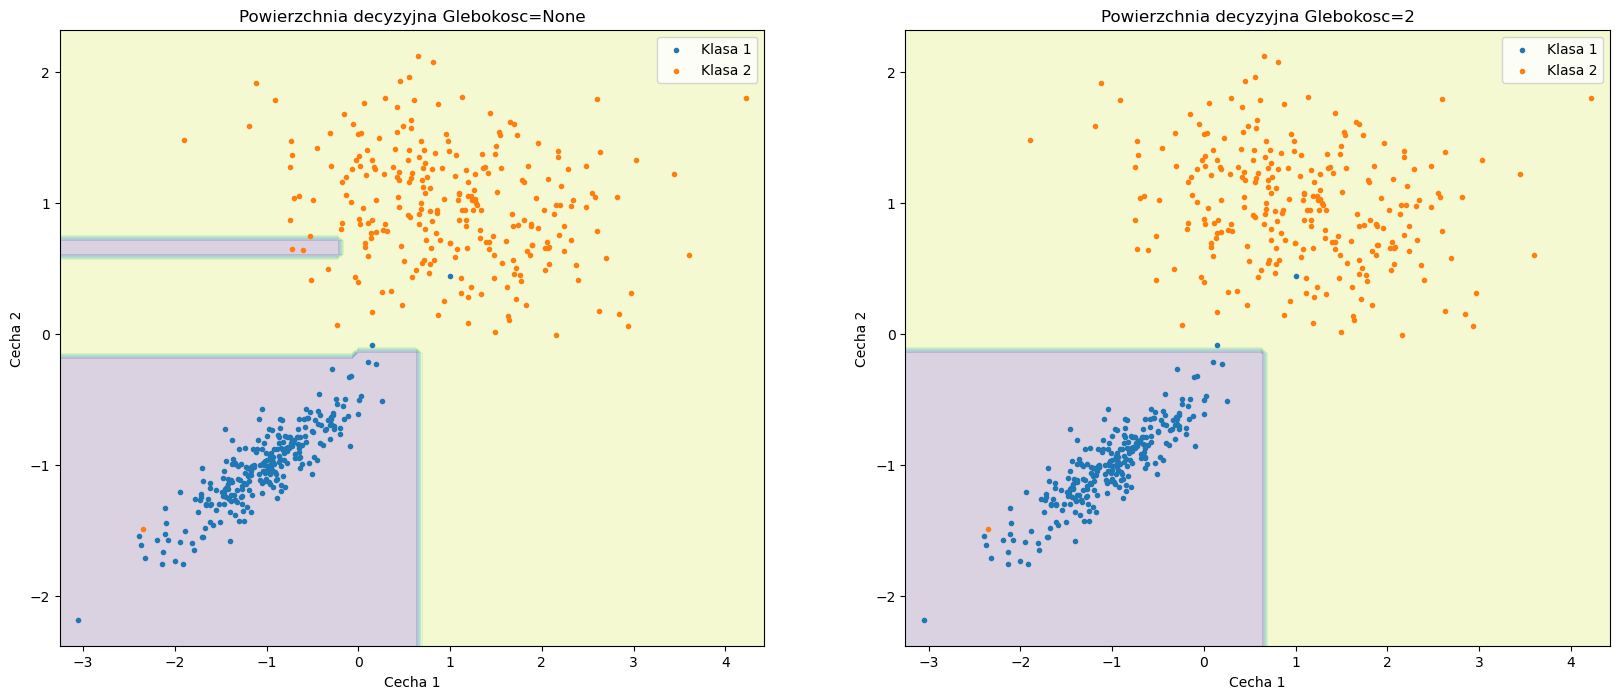

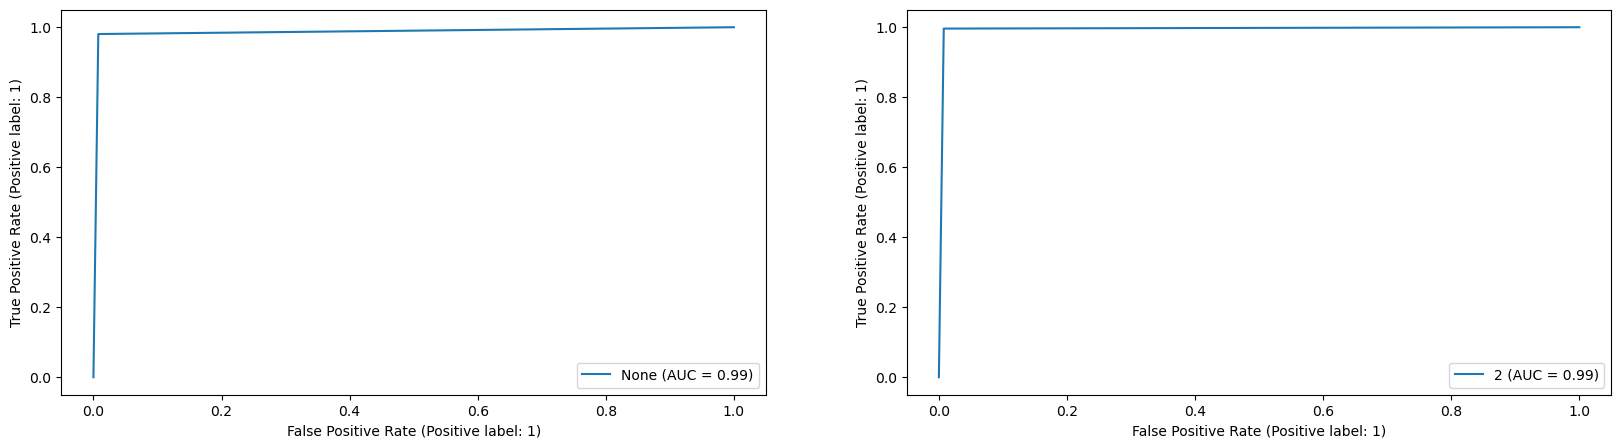

In [102]:
# Nieograniczona glebokosc
dt_m2_n = MDecisionTree()
dt_m2_n.fit(X_train_2, y_train_2)
start = time.time()
for i in range(100):
    y_pred_m2_n = dt_m2_n.predict(X_test_2)
end = time.time()
print(f'Sredni czas przy nieograniczonej glebokosci: {(end - start)} s')

# Glebokosc rowna ilosci cech
dt_m2_2 = MDecisionTree(max_depth=2)
dt_m2_2.fit(X_train_2, y_train_2)
start = time.time()
for i in range(100):
    y_pred_m2_2 = dt_m2_2.predict(X_test_2)
end = time.time()
print(f'Sredni czas przy glebokosci = 2: {(end - start)} s')

pred_info(y_test_2, y_pred_m2_n, 'Glebokosc=None')
pred_info(y_test_2, y_pred_m2_2, 'Glebokosc=2')


plt.figure(figsize=(20, 8))
plt.subplot(1, 2, 1)
plot_class(X_test_2, y_test_2, dt_m2_n, 'Glebokosc=None')
plt.subplot(1, 2, 2)
plot_class(X_test_2, y_test_2, dt_m2_2, 'Glebokosc=2')

_, axs = plt.subplots(1, 2, figsize=(20, 5))
RocCurveDisplay.from_predictions(y_test_2, y_pred_m2_n, name='None', ax=axs[0])
RocCurveDisplay.from_predictions(y_test_2, y_pred_m2_2, name='2', ax=axs[1])

Sredni czas przy nieograniczonej glebokosci: 0.03089618682861328 s
Sredni czas przy glebokosci = 2: 0.018936634063720703 s

Glebokosc=None:
Macierz pomylek: 
[[263   1]
 [  3 253]]
Dokladnosc: 0.9923076923076923
Czulosc: 0.9962
Swoistosc: 0.9883

Glebokosc=2:
Macierz pomylek: 
[[257   7]
 [ 36 220]]
Dokladnosc: 0.9173076923076923
Czulosc: 0.9735
Swoistosc: 0.8594


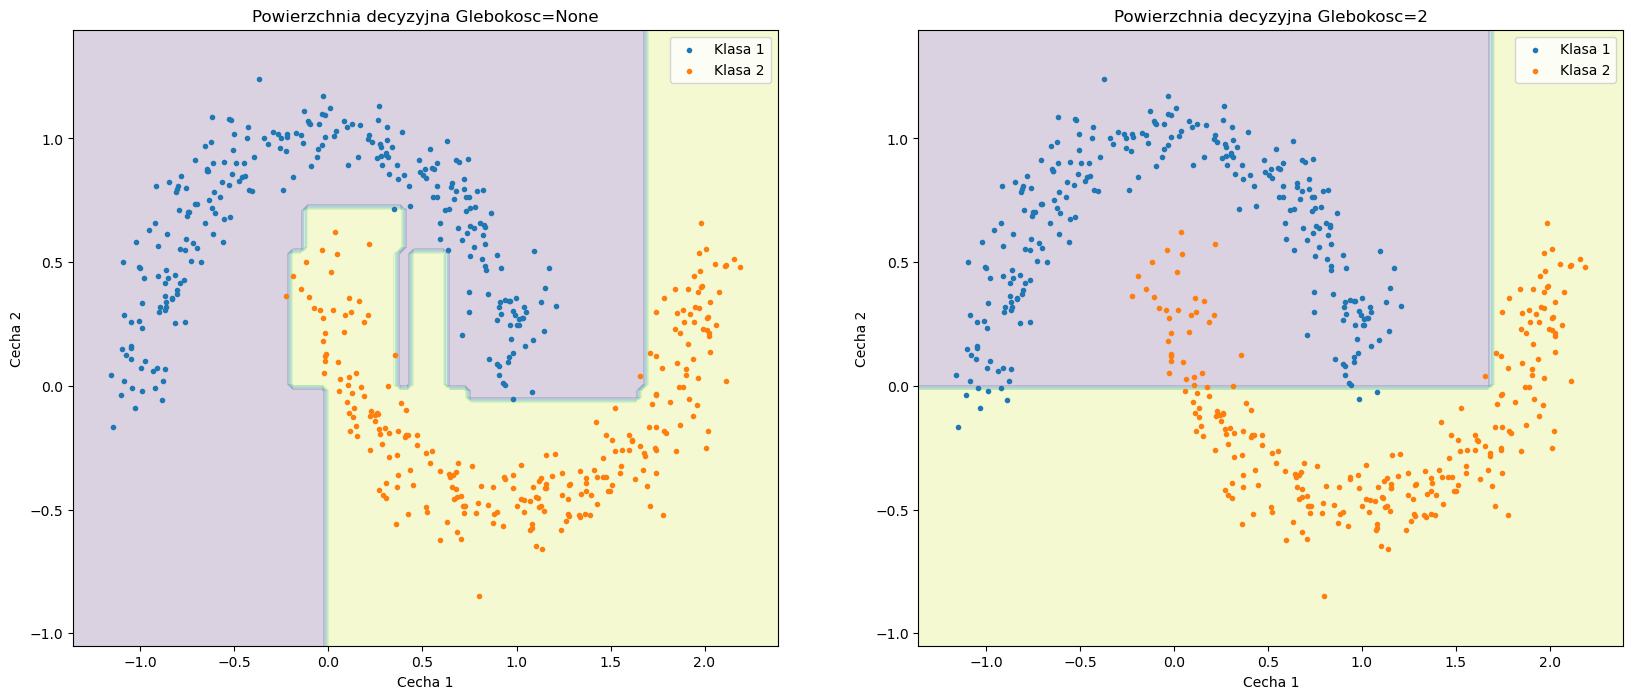

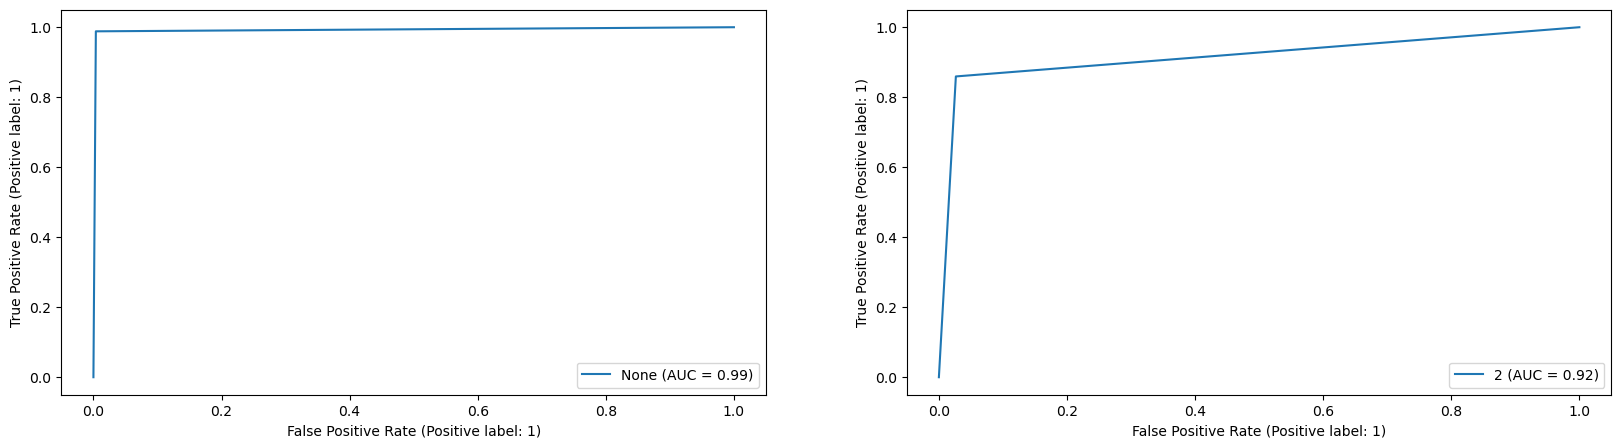

In [103]:
# Nieograniczona glebokosc
dt_m2m_n = MDecisionTree()
dt_m2m_n.fit(X_train_M, y_train_M)
start = time.time()
for i in range(100):
    y_pred_m2m_n = dt_m2m_n.predict(X_test_M)
end = time.time()
print(f'Sredni czas przy nieograniczonej glebokosci: {(end - start)} s')

# Glebokosc rowna ilosci cech
dt_m2m_2 = MDecisionTree(max_depth=2)
dt_m2m_2.fit(X_train_M, y_train_M)
start = time.time()
for i in range(100):
    y_pred_m2m_2 = dt_m2m_2.predict(X_test_M)
end = time.time()
print(f'Sredni czas przy glebokosci = 2: {(end - start)} s')

pred_info(y_test_M, y_pred_m2m_n, 'Glebokosc=None')
pred_info(y_test_M, y_pred_m2m_2, 'Glebokosc=2')


plt.figure(figsize=(20, 8))
plt.subplot(1, 2, 1)
plot_class(X_test_M, y_test_M, dt_m2m_n, 'Glebokosc=None')
plt.subplot(1, 2, 2)
plot_class(X_test_M, y_test_M, dt_m2m_2, 'Glebokosc=2')

_, axs = plt.subplots(1, 2, figsize=(20, 5))
RocCurveDisplay.from_predictions(y_test_M, y_pred_m2m_n, name='None', ax=axs[0])
RocCurveDisplay.from_predictions(y_test_M, y_pred_m2m_2, name='2', ax=axs[1])

Sredni czas przy nieograniczonej glebokosci: 0.03986644744873047 s
Czas przy glebokosci = 4: 0.0002790689468383789 s
Sredni czas przy glebokosci = 5: 0.00030895948410034177 s

Glebokosc=None:
Macierz pomylek: 
[[233  14]
 [ 20 253]]
Dokladnosc: 0.9346153846153846
Czulosc: 0.9433
Swoistosc: 0.9267

Glebokosc=4:
Macierz pomylek: 
[[226  21]
 [ 19 254]]
Dokladnosc: 0.9230769230769231
Czulosc: 0.915
Swoistosc: 0.9304

Glebokosc=5:
Macierz pomylek: 
[[237  10]
 [ 17 256]]
Dokladnosc: 0.948076923076923
Czulosc: 0.9595
Swoistosc: 0.9377


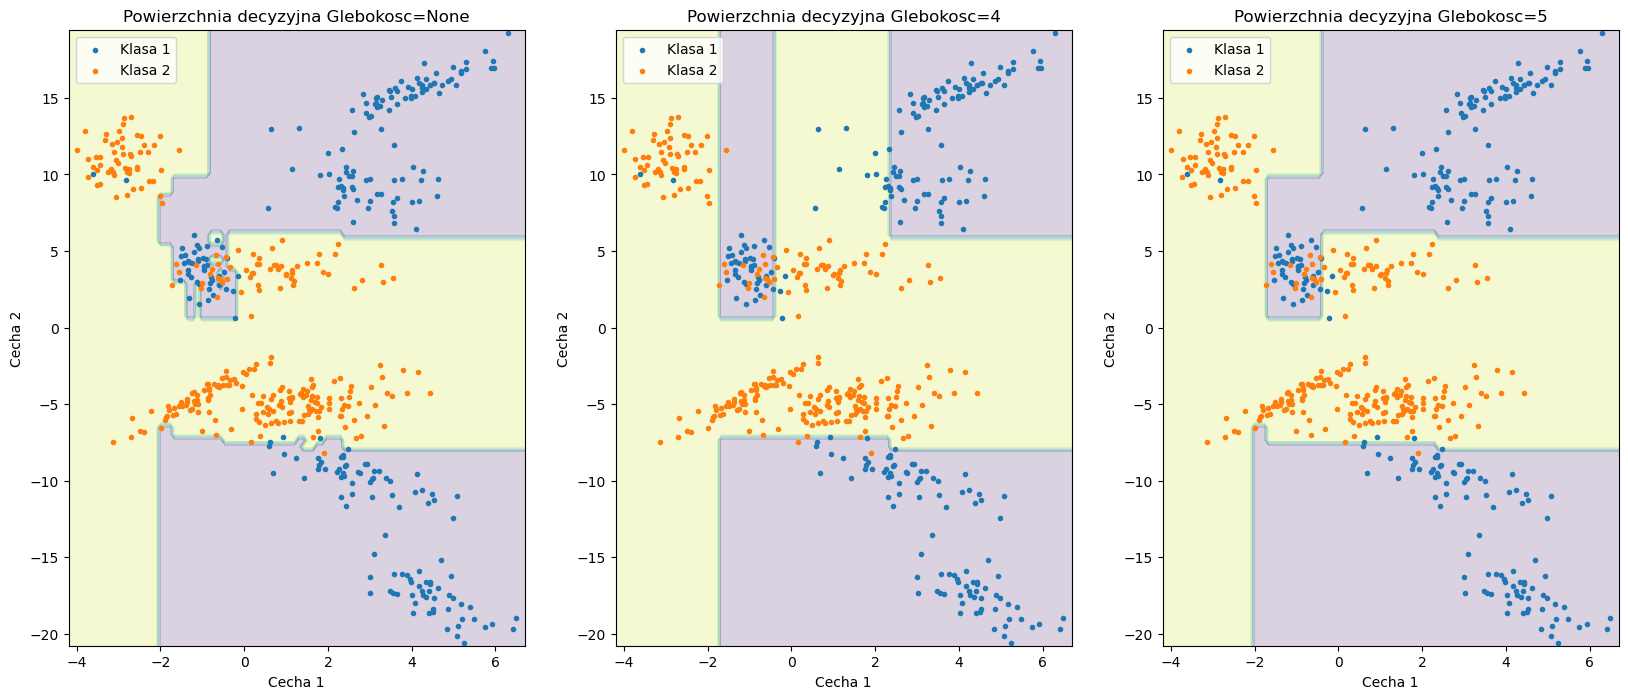

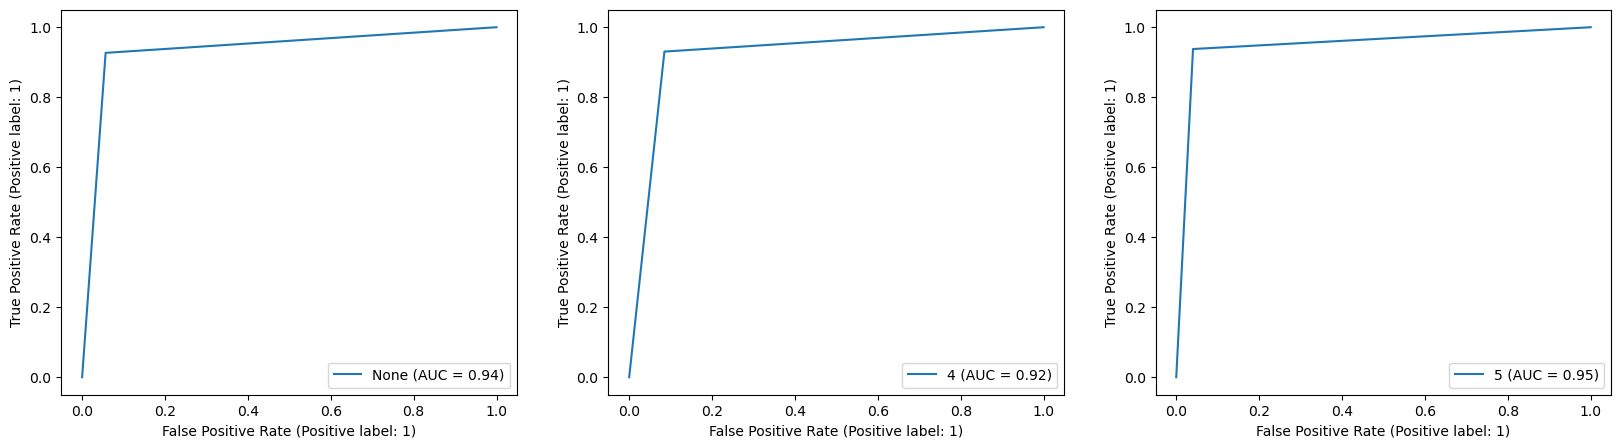

In [104]:
# Nieograniczona glebokosc
dt_m4_n = MDecisionTree()
dt_m4_n.fit(X_train_4, y_train_4)
start = time.time()
for i in range(100):
    y_pred_m4_n = dt_m4_n.predict(X_test_4)
end = time.time()
print(f'Sredni czas przy nieograniczonej glebokosci: {(end - start)} s')

# Glebokosc rowna ilosci cech
dt_m4_4 = MDecisionTree(max_depth=4)
dt_m4_4.fit(X_train_4, y_train_4)
start = time.time()
for i in range(100):
    y_pred_m4_4 = dt_m4_4.predict(X_test_4)
end = time.time()
print(f'Czas przy glebokosci = 4: {(end - start)/100} s')

# Glebokosc rowna ilosci klastrow
dt_m4_5 = MDecisionTree(max_depth=5)
dt_m4_5.fit(X_train_4, y_train_4)
start = time.time()
for i in range(100):
    y_pred_m4_5 = dt_m4_5.predict(X_test_4)
end = time.time()
print(f'Sredni czas przy glebokosci = 5: {(end - start)/100} s')

pred_info(y_test_4, y_pred_m4_n, 'Glebokosc=None')
pred_info(y_test_4, y_pred_m4_4, 'Glebokosc=4')
pred_info(y_test_4, y_pred_m4_5, 'Glebokosc=5')

plt.figure(figsize=(20, 8))
plt.subplot(1, 3, 1)
plot_class(X_test_4, y_test_4, dt_m4_n, 'Glebokosc=None')
plt.subplot(1, 3, 2)
plot_class(X_test_4, y_test_4, dt_m4_4, 'Glebokosc=4')
plt.subplot(1, 3, 3)
plot_class(X_test_4, y_test_4, dt_m4_5, 'Glebokosc=5')

_, axs = plt.subplots(1, 3, figsize=(20, 5))
RocCurveDisplay.from_predictions(y_test_4, y_pred_m4_n, name='None', ax=axs[0])
RocCurveDisplay.from_predictions(y_test_4, y_pred_m4_4, name='4', ax=axs[1])
RocCurveDisplay.from_predictions(y_test_4, y_pred_m4_5, name='5', ax=axs[2])

In [105]:
import pandas as pd

columns = ['mean','stdev', 'kurtosis', 'skewness', 'dm_mean', 'dm_std', 'dm_kurtosis', 'dm_skewness', 'class']
htru_data = pd.read_csv('./dataset/HTRU_2.csv', names=columns)
htru_data.head()

,mean,stdev,kurtosis,skewness,dm_mean,dm_std,dm_kurtosis,dm_skewness,class
0,140.562500,55.683782,-0.234571,-0.699648,3.199833,19.110426,7.975532,74.242225,0
1,102.507812,58.882430,0.465318,-0.515088,1.677258,14.860146,10.576487,127.393580,0
2,103.015625,39.341649,0.323328,1.051164,3.121237,21.744669,7.735822,63.171909,0
3,136.750000,57.178449,-0.068415,-0.636238,3.642977,20.959280,6.896499,53.593661,0
4,88.726562,40.672225,0.600866,1.123492,1.178930,11.468720,14.269573,252.567306,0


In [106]:
# Brakujeace wartosci
htru_data.isna().sum()
# Dane w metodzie drzewa decyzyjnego nie wymagaja normalizacji

mean           0
stdev          0
kurtosis       0
skewness       0
dm_mean        0
dm_std         0
dm_kurtosis    0
dm_skewness    0
class          0
dtype: int64

In [132]:
# Podzial na cechy oraz etykiety
t_htru = np.array(htru_data['class'])
X_htru = np.array(htru_data.drop(columns=['class']))
X_train_htru, X_test_htru, y_train_htru, y_test_htru = train_test_split(X_htru, t_htru,test_size=.2, random_state=index, stratify=t_htru)
# Macierz korelacji
correlation_matrix = pd.DataFrame(htru_data.corr())
correlation_matrix

,mean,stdev,kurtosis,skewness,dm_mean,dm_std,dm_kurtosis,dm_skewness,class
mean,1.000000,0.547137,-0.873898,-0.738775,-0.298841,-0.307016,0.234331,0.144033,-0.673181
stdev,0.547137,1.000000,-0.521435,-0.539793,0.006869,-0.047632,0.029429,0.027691,-0.363708
kurtosis,-0.873898,-0.521435,1.000000,0.945729,0.414368,0.432880,-0.341209,-0.214491,0.791591
skewness,-0.738775,-0.539793,0.945729,1.000000,0.412056,0.415140,-0.328843,-0.204782,0.709528
dm_mean,-0.298841,0.006869,0.414368,0.412056,1.000000,0.796555,-0.615971,-0.354269,0.400876
dm_std,-0.307016,-0.047632,0.432880,0.415140,0.796555,1.000000,-0.809786,-0.575800,0.491535
dm_kurtosis,0.234331,0.029429,-0.341209,-0.328843,-0.615971,-0.809786,1.000000,0.923743,-0.390816
dm_skewness,0.144033,0.027691,-0.214491,-0.204782,-0.354269,-0.575800,0.923743,1.000000,-0.259117
class,-0.673181,-0.363708,0.791591,0.709528,0.400876,0.491535,-0.390816,-0.259117,1.000000


In [133]:
from sklearn.model_selection import GridSearchCV

htru_dt = DecisionTreeClassifier(random_state=index)

param_grid = {
    'criterion': ['gini', 'entropy', 'log_loss'],
    'max_depth': [1, 2, 4, 8, 10, 15, 20, 30],
    'min_samples_split': [2, 4, 8, 10, 15, 20, 30, 40, 50],
    'min_samples_leaf': np.arange(1, 10),
}

grid_search = GridSearchCV(estimator=htru_dt, param_grid=param_grid, cv=3, n_jobs=-1, verbose=1)

start = time.time()
grid_search.fit(X_train_htru, y_train_htru)
end = time.time()
print(f'Sredni czas przy glebokosci = 5: {(end - start)} s')

best_params = grid_search.best_params_
print("Najlepsze parametry:", best_params)

Fitting 3 folds for each of 1944 candidates, totalling 5832 fits
Sredni czas przy glebokosci = 5: 26.140798330307007 s
Najlepsze parametry: {'criterion': 'entropy', 'max_depth': 15, 'min_samples_leaf': 4, 'min_samples_split': 50}


Sredni czas: 0.020929813385009766 s

Najlepsze parametry:
Macierz pomylek: 
[[3222   30]
 [  53  275]]
Dokladnosc: 0.9768156424581006
Czulosc: 0.9908
Swoistosc: 0.8384


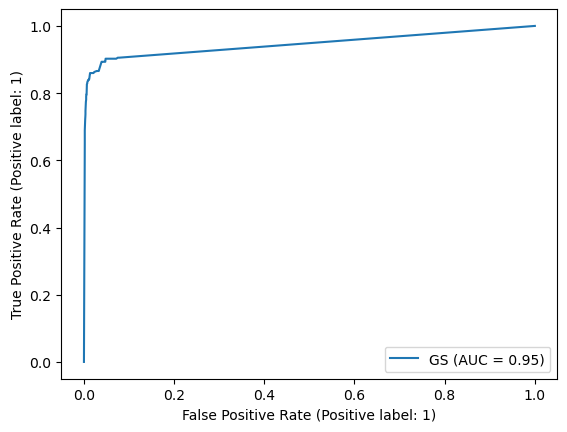

In [134]:
from sklearn.metrics import ConfusionMatrixDisplay

best_estimator = grid_search.best_estimator_
start = time.time()
for i in range(100):
    y_pred_htru = best_estimator.predict(X_test_htru)
end = time.time()
print(f'Sredni czas: {(end - start)} s')


pred_info(y_test_htru, y_pred_htru, 'Najlepsze parametry')
y_scores_htru = best_estimator.predict_proba(X_test_htru)[:, 1]
RocCurveDisplay.from_predictions(y_test_htru, y_scores_htru, name='GS')

In [139]:
depths = range(1,21)
iterations = 10

scikit_times = []
custom_times = []
scikit_acc = []
custom_acc = []

for j, depth in enumerate(depths):
    MDT = MDecisionTree(max_depth=depth)
    SDT = DecisionTreeClassifier(criterion='entropy', max_depth=depth)
    mtimes = []
    macc = []
    stimes = []
    sacc = []
    MDT.fit(X_train_htru, y_train_htru)
    SDT.fit(X_train_htru, y_train_htru)
    for i in range(iterations): 
        start = time.time()
        for i in range(100):
            mpred = MDT.predict(X_test_htru)
        end = time.time()
        times = (end-start)/100
        accuracy = accuracy_score(y_test_htru, mpred)
        macc.append(accuracy)
        mtimes.append(times)

        start = time.time()
        for i in range(100):
            spred = SDT.predict(X_test_htru)
        end = time.time()
        times = (end-start)/100
        accuracy = accuracy_score(y_test_htru, spred)
        sacc.append(accuracy)
        stimes.append(times)
    scikit_times.append(np.mean(stimes))
    custom_times.append(np.mean(mtimes))
    scikit_acc.append(np.mean(sacc))
    custom_acc.append(np.mean(macc))
    print(f'Iteration {j}:\nScikit:\nTime: {scikit_times[j]}, accuracy: {scikit_acc[j]}\nCustom:\nTime: {custom_times[j]}, accuracy: {custom_acc[j]}\n')

Iteration 0:
Scikit:
Time: 8.969950675964355e-05, accuracy: 0.9745810055865924
Custom:
Time: 0.0008762853145599366, accuracy: 0.9745810055865924

Iteration 1:
Scikit:
Time: 0.00011214685440063478, accuracy: 0.9745810055865924
Custom:
Time: 0.0012517399787902832, accuracy: 0.9745810055865924

Iteration 2:
Scikit:
Time: 0.00012358593940734863, accuracy: 0.9773743016759775
Custom:
Time: 0.0016288795471191403, accuracy: 0.9776536312849162

Iteration 3:
Scikit:
Time: 0.00014052867889404296, accuracy: 0.9751396648044693
Custom:
Time: 0.001982719421386719, accuracy: 0.9756983240223465

Iteration 4:
Scikit:
Time: 0.00015149259567260744, accuracy: 0.9770949720670391
Custom:
Time: 0.002267709970474243, accuracy: 0.9776536312849162

Iteration 5:
Scikit:
Time: 0.0001604642868041992, accuracy: 0.9779329608938546
Custom:
Time: 0.0025256001949310303, accuracy: 0.979050279329609

Iteration 6:
Scikit:
Time: 0.00016843724250793456, accuracy: 0.9768156424581006
Custom:
Time: 0.002761081218719483, accurac

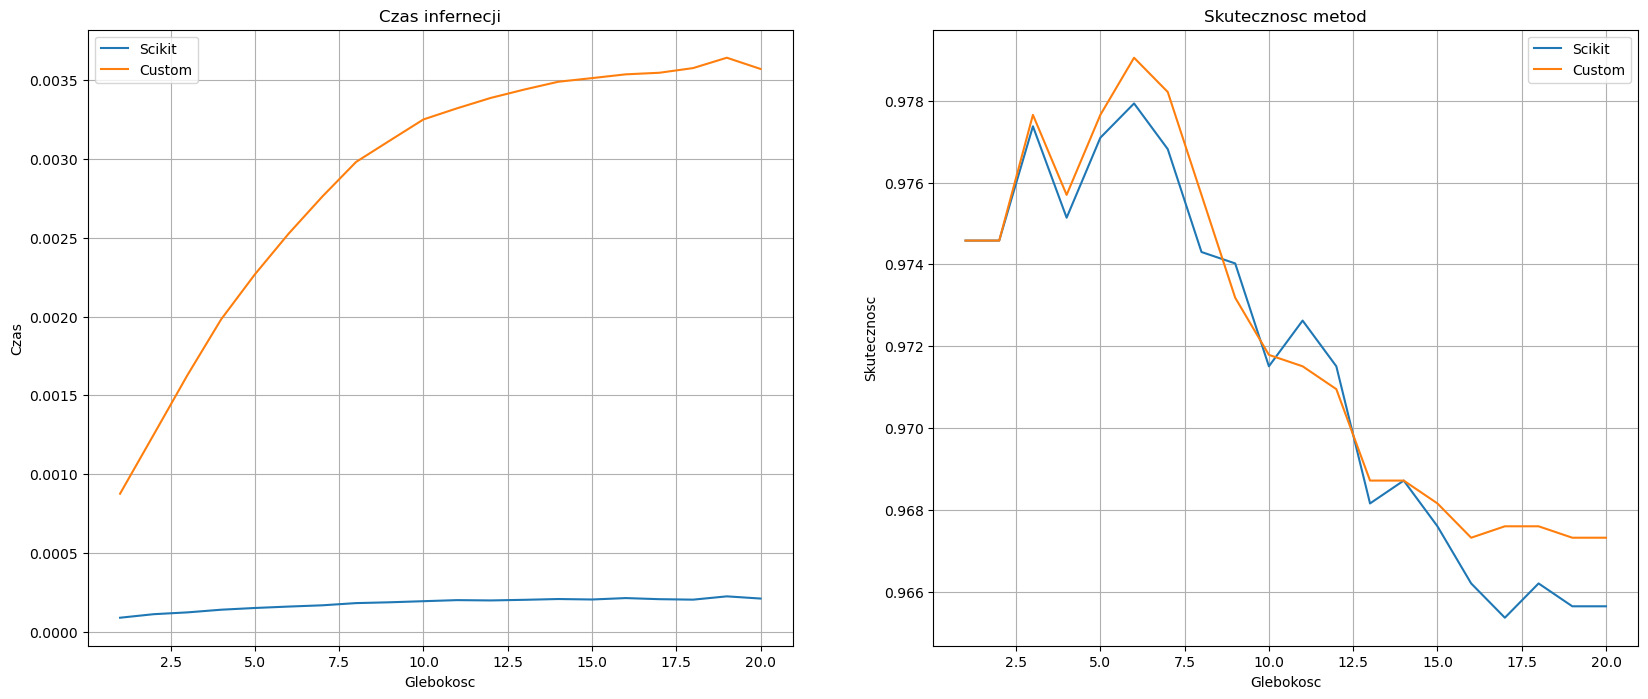

In [145]:
_, axs = plt.subplots(1, 2, figsize=(20, 8))
ax=axs[0]
ax.plot(depths, scikit_times, label='Scikit')
ax.plot(depths, custom_times, label='Custom')
ax.set_title('Czas infernecji')
ax.set_xlabel('Glebokosc')
ax.set_ylabel('Czas')
ax.grid()
ax.legend()

ax=axs[1]
ax.plot(depths, scikit_acc, label='Scikit')
ax.plot(depths, custom_acc, label='Custom')
ax.set_title('Skutecznosc metod')
ax.set_xlabel('Glebokosc')
ax.set_ylabel('Skutecznosc')
ax.grid()
ax.legend()